# Planar Straight-Line Graph and Doubly-Connected Edge List

## Постановка задачи

Пусть мы хотим работать с некоторым разбиением плоскости на области. Но прежде чем работать с такими областями, нужно разработать некоторую удобную для этого структуру. Хранить все области в виде набора отрезков — не очень хорошая идея, так как некоторые операции будут выполняться достаточно долго. 

Намного удобнее хранить некоторую структурную, топологическую информацию: какие отрезки принадлежат данной области, какие области смежны друг с другом и так далее.

Итого, задача которую мы хотим решить — это построение удобной структуры для работы с некоторыми областями на плоскости. 

## Определения

**ППЛГ** (англ. _PSLG_) — Плоский (планарный) прямолинейный граф. Граф называется планарным, если его можно нарисовать на плоскости так, чтобы его ребра не пересекались. Планарный граф называется прямолинейным, если каждое его ребро — это прямая линия.

**Грань** (англ. _face_) — пусть дан ППЛГ. Тогда _грань_ — это множество точек, которое ограничено по периметру рёбрами графа (не обязательно со всех сторон).

**Разбиение плоскости** (англ. _subdivision_) — некоторе разделение плоскости на области. Заметим, что любой плоский граф разбивает плоскость на несколько областей (граней). Одна из граней не ограничена, ее называют внешней (англ. _external_) гранью, а остальные — внутренними (англ. _unbounded_) гранями.

**РСДС** (англ. _DCEL_) — реберный список с двойными связями. Реберный список с двойными связями предназначен для представления ППЛГ.

<center><img src="pictures/planar_graph.png" width="300"></center>
_Пример планарного графа. Синим контуром обозначены грани, за исключением внешней грани (всего 5 граней). Обратите внимание, что внутри грани могут содержаться другие ребра и вершины._

## Описание РСДС

Пусть задан планарный граф $G = (V, E), V = \{v_1, v_2, ... v_n\}, E = \{e_1, e_2, ... e_m\}$. 
<div>
Главная компонента РСДС $-$ это ребро. РСДС представляет изначальные неориентированные ребра как пары ориентированных полуребер, называемых _halfedge_. Между ребрами графа и парами полуребер в РСДС существует биективное отображение, то есть каждое ребро однозначно представлено в РСДС ровно один раз.
<div>

### HalfEdge

_HalfEdge_ содержит указатель на вершину, откуда исходит, указатель на ребро близнец, направленное в другую сторону, инцидентную грань, и указатели на следующее и предыдущее ребра.

In [4]:
class HalfEdge:
    def __init__(self, origin, twin, nxt, prv, incident_face):
        self.origin = origin #Вершина из которой выходит полуребро
        self.twin = twin #Полуребро-близнец, направленное в противоположную сторону
        self.nxt = nxt #Первое ребро, идущее вслед за данным против часовой стрелки
        self.prv = prv #Ребро, для которого nxt - данное ребро
        self.incident_face = incident_face #Инцидентная данному полуребру грань
        #Пара полуребер origin и twin представляют изначальное ребро графа.

### Vertex

Вершины(_Vertex_) в РСДС представляют вершины изначального графа. Вершина содержит в себе информацию о своей геометрии(в простейшем случае просто координаты) и указатель на какое-либо полуребро, инцедентное ей. 

In [6]:
class Vertex:
    def __init__(self, geometry, incident_edge):
        self.geometry = geometry #Описание вершины в пространстве
        self.incident_edge = incident_edge #Инцидентное полуребро

### Face

Грани (_Face_) представляют собой грани изначального графа. Содержит указатель на какое-либо полуребро(_HalfEdge_) на своей границе и список указателей на внутренние компоненты(дырки), то есть по указателю на одно из внешних инцидентных ребер в каждой внутренней грани.

In [8]:
class Face:
    def __init__(self, internal, external):
        self.external = external #Полуребро на границе грани
        self.internal = internal #Список полуребер, отвечающих на внутренние грани

<center><img src="pictures/dcel.png" width="550"></center>
<div style="padding-left:345px">
_Пример РСДС с описанием._
</div>

<center><img src="pictures/DCEL (2).svg" width="300"></center>
<div style="padding-left:450px">
_Пример РСДС._
</div>

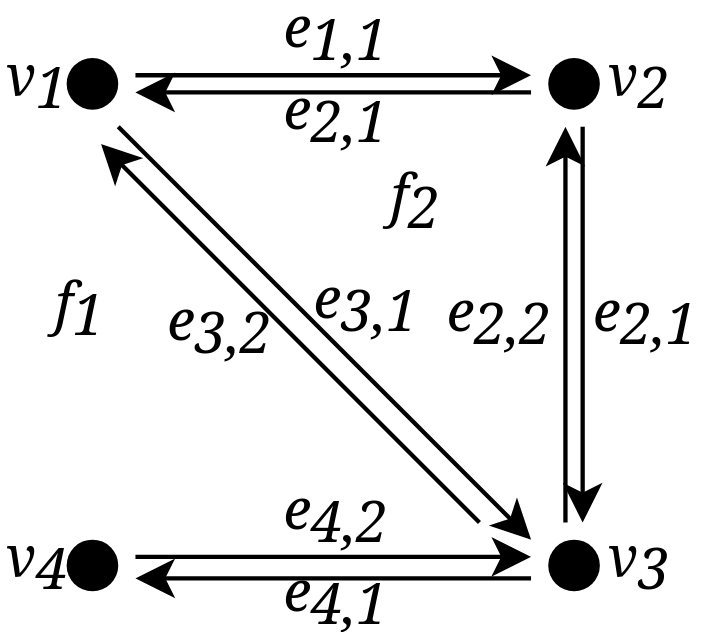

In [3]:
from IPython.display import Image
Image(filename='pictures/DCEL.png')

## Применение 

Итак, мы сказали, что разбиение плоскости порождается планарным прямолинейным графом. То есть, сам граф, по сути, уже является структурой, которая может представлять разбиение. Но от такой структуры пользы будет не очень много. РСДС, в свою очередь, является более удобным представлением, которое позволяет решать различные задачи.

### Пример: получить смежные грани для ребра

Для этого достаточно взять инцидетную область для данного ребра и для его близнеца.

### Пример: перебрать все ребра инцидентные данной вершине по часовой стрелке
Для этого нужно взять полуребро, инцидентное данной вершине, из него перейти в twin, потом в next. Повторять, пока не придем в первое ребро. Заметим, что можно перебрать ребра и против часовой стрелки. Для этого нужно из смежного полуребра переходить в предыдущее, брать близнеца и повторять, пока не придем в первое полуребро.

# Пример: построение РСДС множества прямых

Пусть  $L$ $-$ множество прямых на плоскости. 

Множество $L$ индуцирует разбиение плоскости, состоящее из вершин, ребер и граней (некоторые из которых могут быть неограниченны). Такое разбиение обозначается $A(L)$ и называется _конфигурацией (arrangement_).

Назовем конфигурацию _простой (simple)_ если никакие три прямые не пересекаются в одной точке и никакие две прямые не являются параллельными.

_Сложностью (complexity)_ конфигурации назовем общее число вершин, ребер и граней в ней.

>Утверждение:
Пусть $L$ $-$ множество прямых, $L = \{l_1, ..., l_n\}$. $A(L)$ $-$ кофигурация $L$. Тогда 
1. Число вершин в $A(L)$ не превышает $\frac{n(n - 1)}{2}$
2. Число ребер $A(L)$ не превышает $n^2$
3. Число граней $A(L)$ не превышает $\frac{n^2}{2} + \frac{n}{2} + 1$
<div>
_Во всех трех утверждениях равенство достигается тогда и только тогда, когда конфигурация $A(L)$ простая._

$\triangleright$
<div style="padding-left:40px">
1) Так как вершинами $A(L)$ являются точки пересечения пар прямых из $L$, их количество не может быть более чем $\frac{n(n - 1)}{2}$. Столько вершин будет тогда и только тогда, когда каждая пара прямых порождает одну точку пересечения, а это означает, что $A(L)$ $-$ простая конфигурация.

2) Число ребер на одной прямой на единицу больше, чем число вершин на ней, а число вершин на прямой не превышает $n - 1$. Следовательно, число ребер на одной прямой ограничено сверху величиной $n$. Поэтому число ребер всегда не более $n^2$ и равенство достигается только в том случае, когда конфигурация $A(L)$ простая.

3) Чтобы оценить число граней в $A(L)$ будем добавлять прямые по одной и следить за увеличением количества граней на каждом шаге. $\forall i: 1 \leq i \leq n$ определим $L_i := \{l_1, ..., l_i\}$. Каждое ребро на $l_i$ разбивает какую-то грань $A(L_{i-1})$ на две, поэтому число граней увеличивается на число ребер $A(L_{i-1})$ на прямой $l_i$. Но это число не превышает $i$, поэтому число граней не может быть больше 
<center>$$1 + \sum_{i=1}^n i = \frac{n^2}{2} + \frac{n}{2} + 1$$</center>
Заметим, что равенство снова достигается тогда и только тогда, когда $A(L)$ $-$ простая конфигурация.
</div>
$\triangleleft$

Таким образом, конфигурация $A(L)$, порожденная множеством прямых $L$ является планарным разбиением не более чем квадратичной сложности. Для хранения такой конфигурации РСДС кажется подходящей структурой: он позволяет эффективно перебирать ребра данной грани, переходить от одной грани к другой и т.д. 

#### Алгоримт построения

##### Заметающая прямая

Первое, что приходит на ум для решения данной задачи $-$ заметающая прямая. Нетрудно адаптировать алгорит заметающей прямой для построения конфигурации $A(L)$. Поскольку количество точек пересечения растет квадратично, алгоритм будет работать за $O(n^2log(n))$. Но поскольку сложность конфигурации квадратична, хотелось бы иметь алгоритм, работающий за $O(n^2)$.

##### Инкрементальный алгоритм

Рассмотрим другой подход: инкрементальное построение РСДС. Инкрементальный алгоритм добавляет прямые $l_1, l_2, ..., l_n$ по одной и на каждой итерации обновляет РСДС.
<div>
Обозначим $A_i$ разбиение плоскости, индуцированное $A(\{l_1, ..., l_i\})$. Чтобы добавить $l_i$ необходимо разбить грани конфигурации $A_{i-1}$, которые пересекает $l_i$. Чтобы найти эти грани, пройдем по уже существующим полуребрам вдоль $l_i$ слева направо, попутно разбивая пересекаемые грани следующим образом: пусть мы уже разбили _k_ первых граней, пересекаемых $l_i$ и хотим разбить _k+1_. Назовем ее _f_. Так как мы идем слева направо, грань слева от _f_ уже разбита. В частности, разбито ребро _e_, через которое мы входим в _f_. Разбиение _f_ происходит следующим образом: сначала создаем две новые записи о гранях: по одной для частей _f_ выше и ниже $l_i$. Проходим вдоль границы _f_, следуя по указателям _next_, пока не достигнем полуребра соответствующего ребра _e'_, где $l_i$ покидает _f_. Затем разбиваем ребро _e'_, через которое $l_i$ покидает _f_ и создаем новую вершина для $l_i \cap e'$ (если $l_i$ покидает _f_ через какую-то вершину, то этот шаг пропускается). Добавим записи о полуребрах $l_i \cap f$. Таким образом, остается правильно инициализировать различные указатели на новые записи о грани, вершине и полуребрах, направить некоторые существующие указатели на новые записи о вершине, грани и полуребрах и уничтожить записи о грани _f_ и полуребрах _e'_. Это делается также, как в задаче о наложении двух разбиений. Общее время разбиения линейно зависит от сложности _f_.

<center><img src="pictures/splitting.png" width="525"></center>
<div style="padding-left:400px">
_Разбиение грани._
</div>

Заметим, что при проходе вдоль $l_i$ мы действительно можем покинуть очередную грань только двумя способами. Опишем их подробнее:
1. Пусть мы покидаем _f_ по некоторому ребру _e'_. Тогда воспользуемся указателем _twin_ этого полуребра, чтобы добраться до другого полуребра _e'_ в РСДС. Таким образом, мы найдем следующую грань за время, пропорциональное сложности _f_. 
2. Пусть мы покидаем _f_ через некоторую вершину _v_. Тогда совершим обход вокруг _v_, посещая все инцидентные ей ребра, пока не найдем следующую грань, которую пересекает $l_i$. РСДС позволяет сделать это за время, пропорциональное степени вершины _v_.

<center><img src="pictures/traversing-arrangement.png" width="400"></center>
<div style="padding-left:400px">
_Обход конфигурации._
</div>

#### Оценка времени работы

Для оценки времени разбиения граней введем понятие _зоны_. 

_Зоной_ прямой $l$ в конфигарации $A(L)$ называется множество граней $A(L)$, замыкания которых пересекают $l$. 

_Сложность_ зоны определяется как суммарная сложность всех составляющих ее граней (то есть, общее количество ребер и вершин в грани). Время, необходимое для добавления прямой $l_i$ линейно зависит от сложности зоны $l_i$ в конфигурации $A(\{l_1, ..., l_i\})$.

<center><img src="pictures/zone.png" width="500"></center>
<div style="padding-left:355px">
_Зона прямой в конфигурации._
</div>

>Утверждение:
Сложность зоны прямой $l$ в конфигурации $m$ прямых на плоскости равна $O(m)$.

$\triangleright$
<div style="padding-left:40px">
Пусть $L = \{l_1, ..., l_m\}$ $-$ множество $m$ прямых на плоскости, $l$ $-$ еще одна прямая. Без потери общности, можем считать, что $l$ совпадает с осью $x$ (в противном случае можем заменить систему координат).
<div></div>
Каждое ребро в $A(L)$ инцидентно двум граням. Назовем ребро _левым граничным_ для грани, примыкающей к нему справа и _правым граничным_ для грани, примыкающей слева. Для доказательства утверждения достаточно показать, что количество левых граничных ребер (и, соответственно, правых) в зоне $l$ не превышает $5m$.
<div></div>
Доказательство проведем индукцией по $m$.
<div></div>
В базовом случае, $m=1$, утверждение очевидно (одна прямая индуцирует зону, содержащую две неограниченные грани).
<div></div>
Рассмотрим случай $m \gt 1$. Из прямых, входящих в $L$, обозначим $l_1$ ту, точка пересечения которой с $l$ лежит правее всех остальных (если таких прямых несколько, то возьмем любую из них). По предположению индукции, зона $l$ в $A(L \setminus \{l_1\})$ содержит не более $5(m-1)$ левых граничных ребер. В результате добавления прямой $l_1$ количество левых граничных ребер может увеличиться двумя способами: 
<div style="padding-left:10px">
1) Возникают новые левые граничные ребра на $l_1$, а старые левые граничные ребра разбиваются $l_1$ на части. Рассмотрим точки $v$ $-$ первая точка пересечения $l_1$ с другой прямой из $L$, расположенная выше $l$, $w$ $-$ первая точка пересечения, расположенная ниже $l$. Ребро, соединяющее $v$ и $w$, является новым левым граничным ребром на $l$.
<div></div>
2) Кроме того, $l_1$ разбивает существующее левое граничное ребро в точках $v$ и $w$. В результате количество левых граничных ребер увеличивается на $3$ Если не существует таких $v$ и $w$, то увеличение будет еще меньше.
</div>
Утверждается, что больше никаких способов увеличить число левых граничных ребер нет, так как все, что находится выше $v$ и ниже $w$ не принадлежит зоне $l$.
<div></div>
Таким образом, количество левых граничных ребер может увеличиться не более чем на $3$. В этом случае общее число левых граничных ребер не превышает $5(m-1)+3 \lt 5m$.
<div></div>
До сих пор предпологалось, что прямая $l_1$, проходящая через самую правую точку пересечения на $l$, единственная. Однако, те же рассуждения, что и выше показывают, что в случае прохождения более чем одной прямой через точку пересечения число левых граничных ребер увеличивается не более чем на $5$. Поэтому, общее число левых граничных ребер не превосходит $5(m-1)+5 = 5m$.
</div>
$\triangleleft$

<center><img src="pictures/bounding-edges.png" width="400"></center>
<div style="padding-left:340px">
_Пример нового левого граничного ребра._
</div>

>Утверждение:
Сложность инкрементального алгоритма $O(n^2)$.

$\triangleright$
<div style="padding-left:40px">
Ограничим сверху время работы инкрементального алгоритма построения конфигурации. Так как время, необходимое для вставки $l_i$ линейно зависит от сложности зоны $l_i$ в $A(\{l_1, ..., l_{i-1}\})$, то по доказанному утверждению время вставки всех прямых равно
<center><div>
$$\sum_{i=1}^n O(i) = O(n^2)$$
</div></center>

Таким образом, сложность каждого шага алгоритма не более чем квадратична, следовательно сложность всего алгоритма построения $O(n^2)$.
</div>
$\triangleleft$